## 'Exploratory Data Analysis’ on dataset ‘Global Terrorism’

Done by - Sushma Narayan Hegde as a part of internship offered by **Sparks Foundation**

## Objective

Terrorism is a threat of violence that creates fear in a population. It is also important to understand that all violent acts are not terrorist acts.

As a security/defense analyst,find out the hot zone of terrorism and derive some security issues and insights by EDA.

## TABLE OF CONTENTS:
* [What this data set is all about?](#dataset)
* [Installation of Libraries and Dataset](#installation)
* [Data preperation and Cleaning](#preperation)
* [Analysis](#analysis)
* [Motive behind activities related to terrorism](#motive)
* [Number Of Terrorist Activities vs Year](#year-activity)
* [What are the attacking methods used?](#attacking-methods)
* [Who are the targets?](#targets)
* [Hot zones of terrorism.](#region)
* [AttackType vs Region](#attacktypevsregion)
* [Terrorism By Country](#bycountry)
* [Attacks vs Killed](#vskilled)
* [Most Notorious Groups](#notorious)
* [Activity of Top Terrorist Groups](#topterrorist)
* [Most Notorious Groups in India and Favorite Attack Types](#indiamost)
* [Inferences and Conclusion](#conclusion)

## What this data set is all about?<a class="anchor" id="dataset"></a>

1. Consists pf Information on more than 180,000 Terrorist Attacks.

2. Includes information on terrorist attacks around the world from 1970 through 2017.

3. Includes systematic data on domestic as well as international terrorist incidents that have occurred during specific time period. 

<img src="https://www.abc.net.au/cm/rimage/12918976-3x2-xlarge.jpg?v=2"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

## Installation of libraries and dataset<a class="anchor" id="installation"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
row_data_df = pd.read_csv('~/Downloads/globalterrorismdb.csv',encoding = 'ISO-8859-1',low_memory=False)

In [4]:
type(row_data_df)

pandas.core.frame.DataFrame

In [5]:
row_data_df.info()
row_data_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 146.9+ MB


(181691, 135)

## Data preperation and Cleaning<a class="anchor" id="preperation"></a>

In [6]:
row_data_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
df = row_data_df.copy()

In [8]:
df.dropna(axis=1,how='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

df['casualities']=df['Killed']+df['Wounded']
df.head(5)


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [10]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

## Basic Analysis <a class="anchor" id="analysis"></a>

In [11]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Weapon_type'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Regions with Highest Terrorist Attacks: Explosives
Maximum people killed in an attack are: 1570.0 that took place in Iraq


## Motive behind activities related to terrorism<a class="anchor" id="motive"></a>

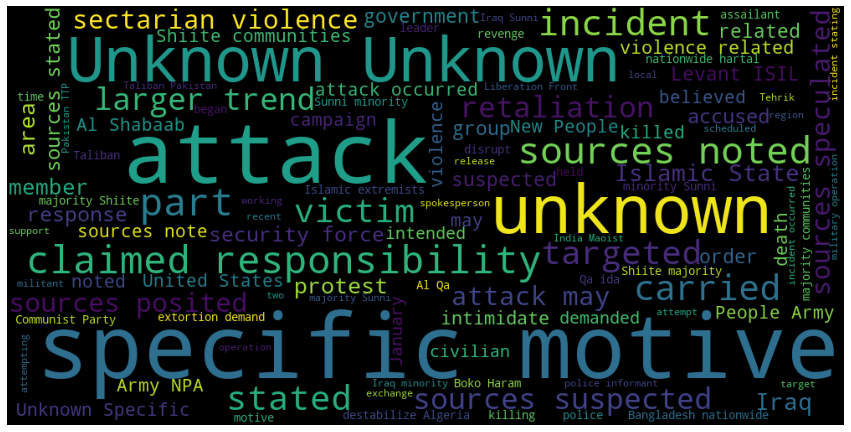

In [12]:
south_df = df_new = df[df['Motive'].notnull()].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['Motive'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 10).generate(text)                  
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

## Food For Brain !
Why motives are unknown? Where are we lagging in real life in finding motive?!

## Number Of Terrorist Activities vs Year <a class="anchor" id="year-activity"></a>

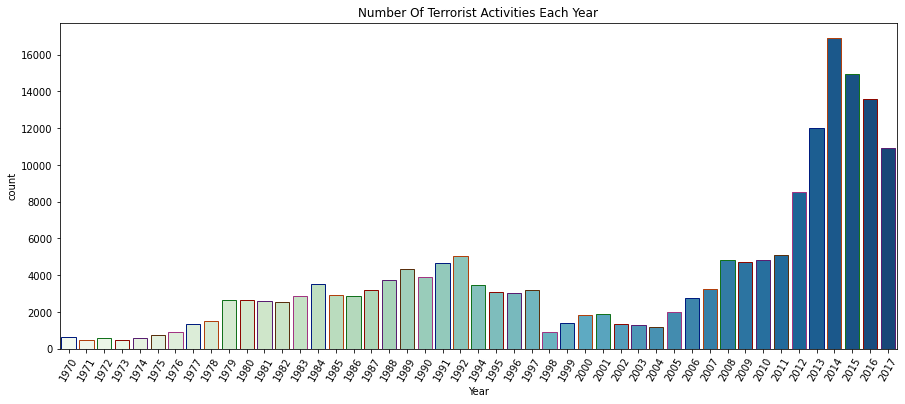

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='GnBu',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#### Remarks

Eventhough measures and actions and taken by the government as well by the people terrorist activities are increasing year by year

## What are the attacking methods used? <a class="anchor" id="attacking-methods"></a>

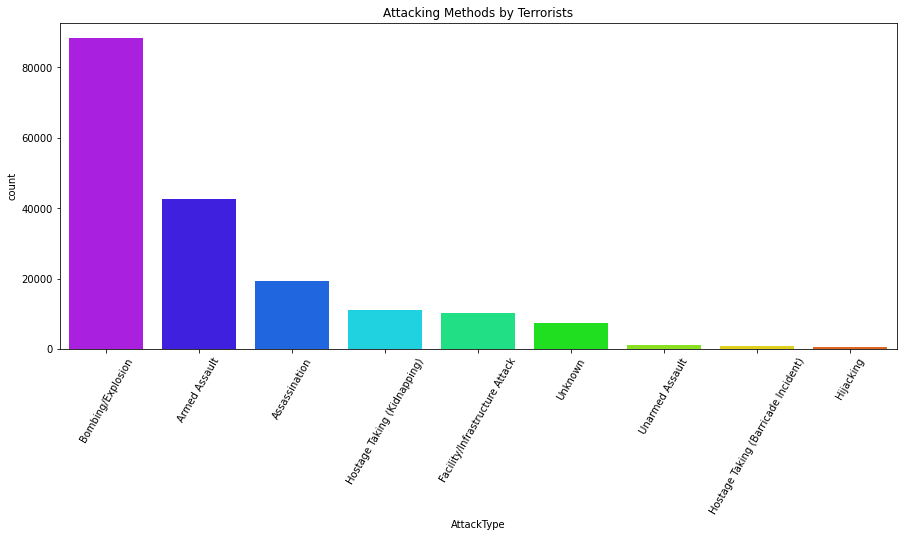

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=df,palette='gist_rainbow_r',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Attacking Methods by Terrorists')
plt.show()

#### Remarks

Bombing and Explosion is the most used attacking method.No. of people harmed or the loss caused by this is the maximum.

## Who are the targets? <a class="anchor" id="targets"></a>

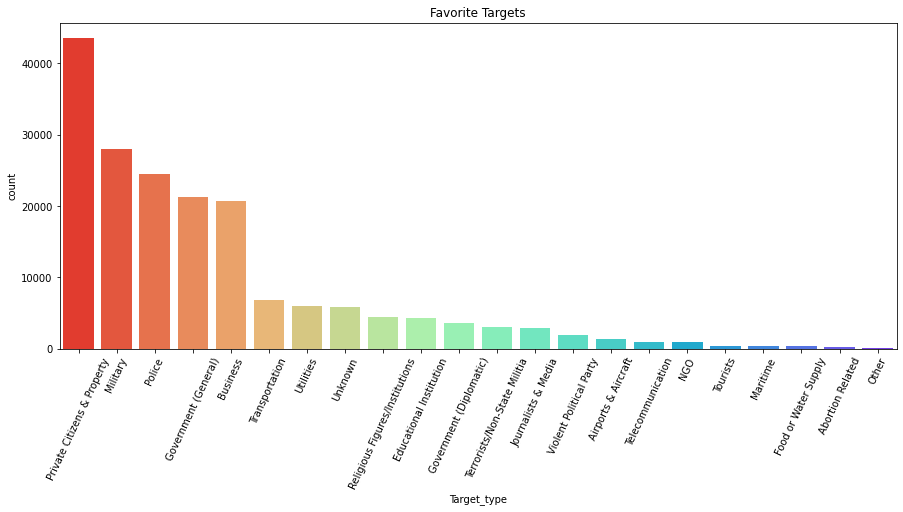

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Target_type'],palette='rainbow_r',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=65)
plt.title('Favorite Targets')
plt.show()


#### Remarks

Citizens and property is the most targeted. Then comes the military and the police. Be careful and learn to fight back !

## Hot zones of terrorism. <a class="anchor" id="region"></a>

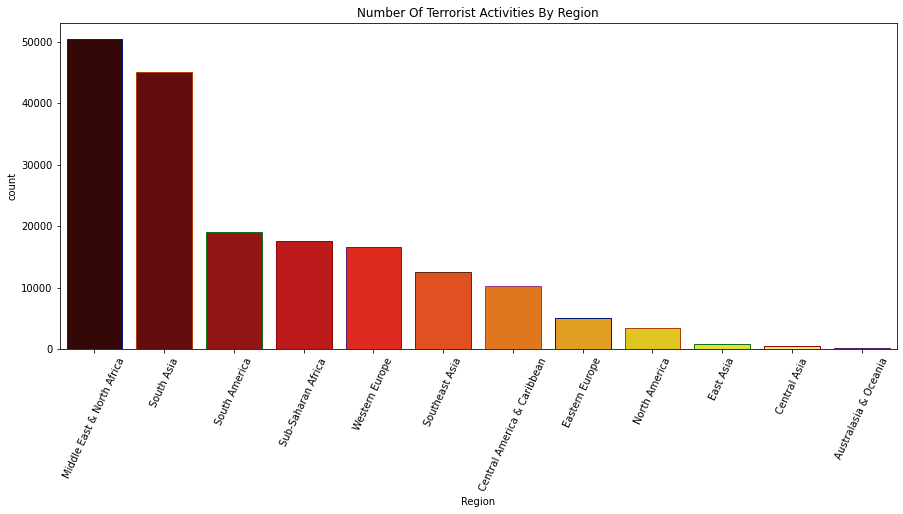

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df,palette='hot',edgecolor=sns.color_palette('dark',7),order=df['Region'].value_counts().index)
plt.xticks(rotation=65)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

#### Remarks

Hot zome is middle east & North Africa.South Asia ranks next. From the graph it can be seen that half of the of the terrosist
activities are conducted in these two area.


## AttackType vs Region <a class="anchor" id="attacktypevsregion"></a>

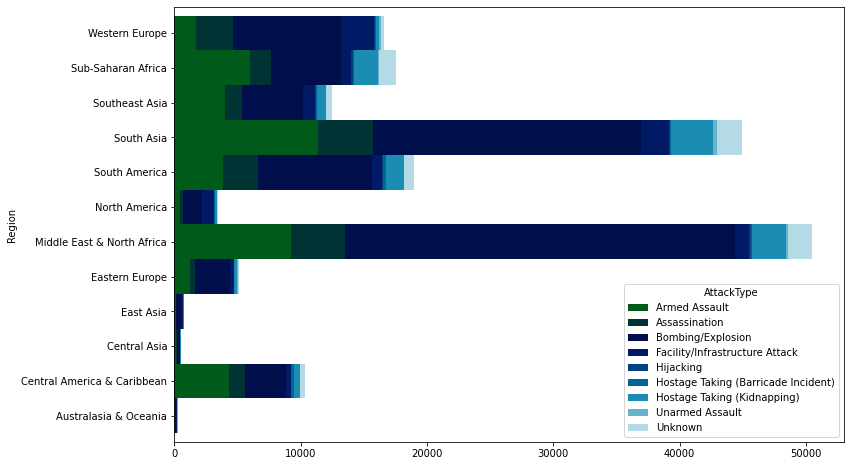

In [17]:
pd.crosstab(df.Region,df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('ocean',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

#### Remarks

Various reginons are affected by various terrorist activities. Observe the region and the attacktype use used by the terrorists.

## Terrorism By Country <a class="anchor" id="bycountry"></a>

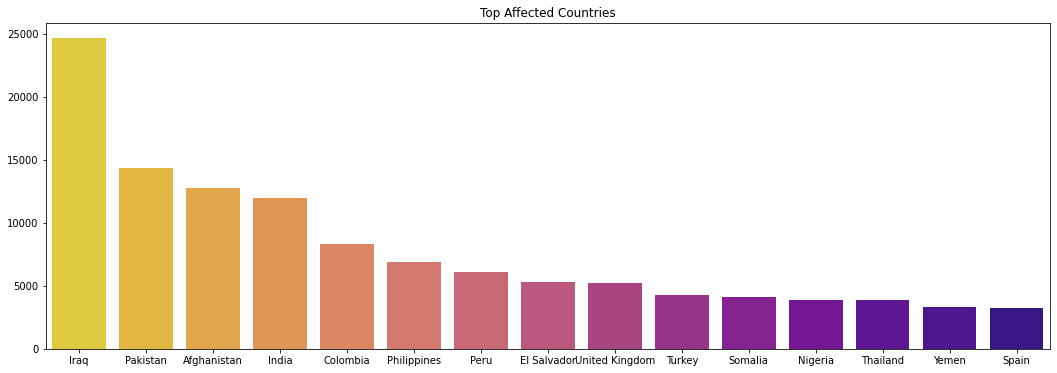

In [18]:
plt.subplots(figsize=(18,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='plasma_r')
plt.title('Top Affected Countries')
plt.show()

#### Remarks

Iraq stands first in terms of terrorism and terrorist activities(Based on the dataset from 1970 through 2017).

#### Facts to KNOW
India's rank falling from 8th in 2017 and 2018 to 7th in 2019 reflecting a worsening of the overall security situation in the country on grounds of terrorism.


## Attacks vs Killed <a class="anchor" id="vskilled"></a>

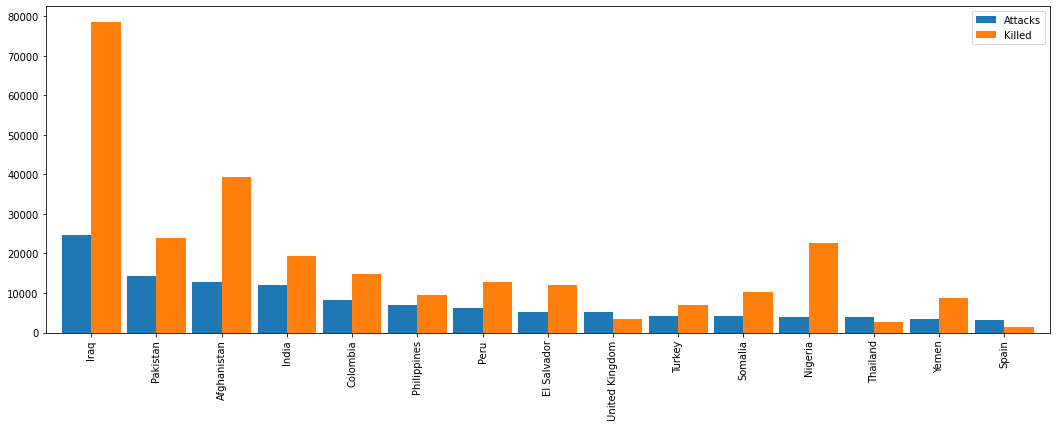

In [19]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

#### Remarks

There is a huge difference between the no. of attacks and the no. of people died. Each attack must have taken the lives of so many innocent people.
DON'T we have any way to stop terrorism?

## Most Notorious Groups <a class="anchor" id="notorious"></a>

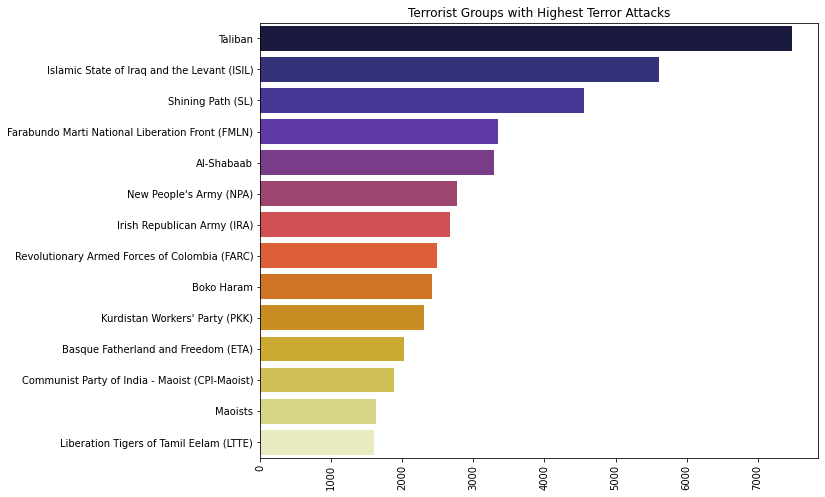

In [20]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('CMRmap'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

#### Remarks

Who doen't know Taliban.Interestingly, the one who is not even educated knows that Taliban is the wildest. EDA also concludes the same !.
Taliban is the most notorious terrorist group

## Activity of Top Terrorist Groups <a class="anchor" id="topterrorist"></a>

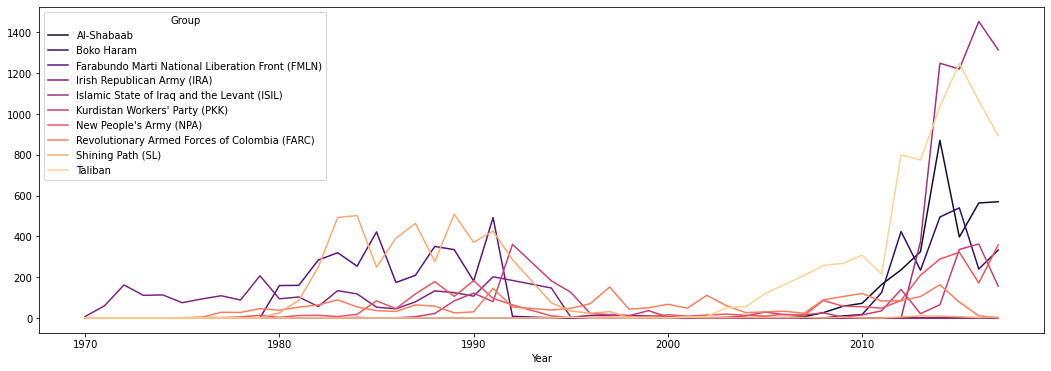

In [21]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

#### Remarks

It's time to observe the activity of terrosists groups !

## Most Notorious Groups in India and Favorite Attack Types <a class="anchor" id="indiamost"></a>

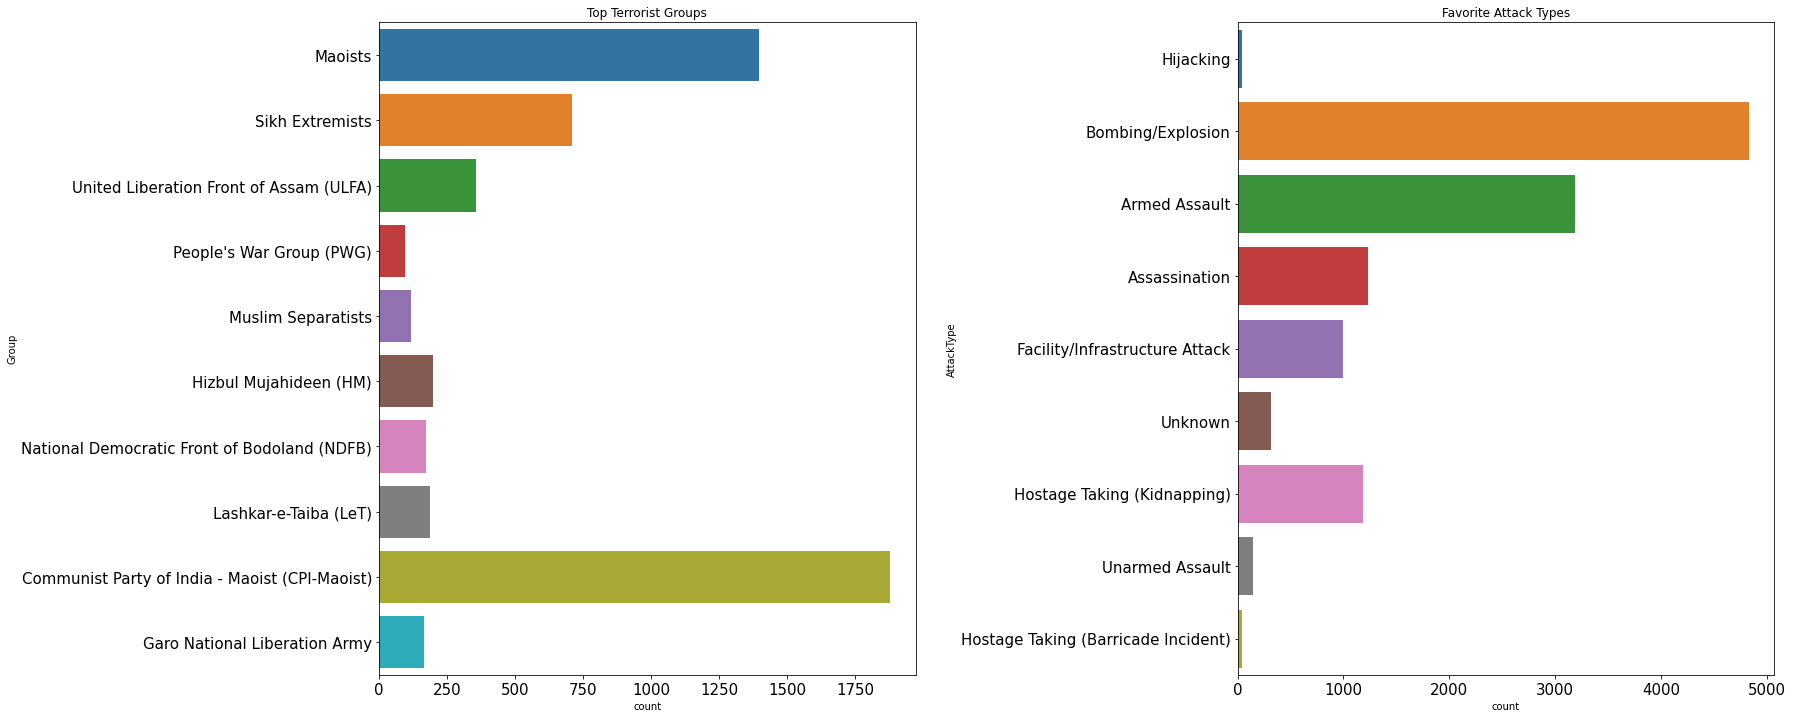

In [22]:
terror_india=df[df['Country']=='India']
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

#### Remarks 
Terrorism not only paved an impact on the life and property but also create fear in the population. Note what are the most notorious terrorist groupd of India and how do they attack.

#### Facts to KNOW
India has witnessed several terror attacks so far. 8 major attacks that shook India are:

    1. Pulwama Attack in 2019
    
    2. Uri Attack in 2016
    
    3. 26/11 Mumbai attack in 2008
    
    4. Jaipur Blasts in 2008
    
    5. Mumbai Train Bombings in 2006
    
    6. Delhi Bomb blast in 2005
    
    7. Parliament attack in 2001
    
    8. Bombay blasts in 1993



## Inferences and Conclusion <a class="anchor" id="conclusion"></a>

We come to the end of project :)


To conclude, we have seen various types of analysis and question and answers with the data set I found interesting. Here is something I feel worth to share. We just look at data set all we can say is that we just know what are the columns and what it contains.So Exploratory Data Analysis is a very efficient way to make our work easy. With python libraries like pandas, numpy, matplotlib, seaborn allow us to come to conclusions calculating and vizualization. 

There are some functions which I used in this notebook.I hope this is informative to you:

1.You can use the dataset which you have stored locally or we can use Opendatasets library which helps us in downloading and using datasets like kaggle.

2.Some of basic function of pandas are describe,sum,mean,info,shape,columns,unique etc.

3.There are functions available to clean our data set to extract required columns.

4.Variety of graphs can be plotted, which are very informative using 3-4 lines of code. 

5.Matplotlib and seaborn are really useful for plotting graph and vizualization makes an easy way to answer our questions.